In [1]:

from time import strftime

import numpy as np
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.optimizers import SGD
from tflearn.data_utils import to_categorical
%matplotlib inline

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
TRAIN_DATA = "hlp-dataset-4875-(26, 13)-train.npy"
VALIDATE_DATA = "hlp-dataset-2089-(26, 13)-validate.npy"
TEST_DATA = "hlp-dataset-365-(26, 13)-test.npy"

LR = 1e-4
ROW_SIZE = 26
COL_SIZE = 13
EPOCHS = 300
CLASSES = 10 #[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
MODEL_NAME = f"HLP-{EPOCHS}-5"

In [3]:
def prepareData():
    train_data = np.load(TRAIN_DATA, allow_pickle=True)
    validate_data = np.load(VALIDATE_DATA, allow_pickle=True)
    np.random.shuffle(train_data)
    np.random.shuffle(validate_data)
     
    X = []
    y = []
    test_x = []
    test_y = []
    
    for img in train_data:
        X.append(img[0])
        y.append(to_categorical([img[1]], CLASSES)[0])
        
    for img in validate_data:
        test_x.append(img[0])
        test_y.append(to_categorical([img[1]], CLASSES)[0])
        
    X = np.array(X).reshape(-1, COL_SIZE, ROW_SIZE, 1)
    test_x = np.array(test_x).reshape(-1, COL_SIZE, ROW_SIZE, 1)
    return X, np.array(y), test_x, np.array(test_y)


In [4]:
# TODO: Aumentar numero de epocas. algo entre 500 - 1000
X, y, test_x, test_y = prepareData()
X = X/255.0

convnet = input_data(shape=[None, COL_SIZE, ROW_SIZE, 1], name='input')

convnet = conv_2d(convnet, 128, 3, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 3, activation='relu')
convnet = max_pool_2d(convnet, 2)

# convnet = conv_2d(convnet, 32, 3, activation='relu')
# convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 128, activation='relu')

convnet = fully_connected(convnet, CLASSES, activation='softmax')

optmizer = SGD(learning_rate=LR, decay_step=1e-3)
convnet = regression(convnet, optimizer=optmizer, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir=f"../logs/hlp/{MODEL_NAME}-{strftime('%d-%m-%Y')}-{strftime('%H-%M-%S')}")

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [5]:
model.fit({'input': X}, {'targets': y}, n_epoch=EPOCHS, validation_set=({'input': test_x}, {'targets': test_y}), 
    show_metric=True, run_id=MODEL_NAME)

Training Step: 23099  | total loss: 2.20344 | time: 0.463s
| SGD | epoch: 300 | loss: 2.20344 - acc: 0.4267 -- iter: 4864/4875
Training Step: 23100  | total loss: 2.20190 | time: 1.473s
| SGD | epoch: 300 | loss: 2.20190 - acc: 0.4309 | val_loss: 11.97753 - val_acc: 0.4203 -- iter: 4875/4875
--


In [6]:
model.save(f"{MODEL_NAME}.tflearn")

INFO:tensorflow:C:\Users\Skzt-Desk\PycharmProjects\faculdade\HolisticDataset\HLP-300-5.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [29]:
model.load(f"{MODEL_NAME}.tflearn")

INFO:tensorflow:Restoring parameters from C:\Users\Skzt-Desk\PycharmProjects\faculdade\HolisticDataset\HLP-1000-2.model


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Conv2D_2/W not found in checkpoint
	 [[node save_14/RestoreV2 (defined at C:\VirtualEnv\tcc-venv\lib\site-packages\tflearn\helpers\trainer.py:147) ]]

Caused by op 'save_14/RestoreV2', defined at:
  File "C:\Users\Skzt-Desk\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Skzt-Desk\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Skzt-Desk\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\Skzt-Desk\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\Skzt-Desk\AppData\Local\Programs\Python\Python37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-433424a87bf9>", line 23, in <module>
    model = tflearn.DNN(convnet, tensorboard_dir=f"../logs/hlp/{MODEL_NAME}-{strftime('%d-%m-%Y')}-{strftime('%H-%M-%S')}")
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tflearn\models\dnn.py", line 65, in __init__
    best_val_accuracy=best_val_accuracy)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tflearn\helpers\trainer.py", line 147, in __init__
    allow_empty=True)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\training\saver.py", line 832, in __init__
    self.build()
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\training\saver.py", line 844, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\training\saver.py", line 881, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\training\saver.py", line 513, in _build_internal
    restore_sequentially, reshape)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\training\saver.py", line 332, in _AddRestoreOps
    restore_sequentially)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\training\saver.py", line 580, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1656, in restore_v2
    name=name)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\VirtualEnv\tcc-venv\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Conv2D_2/W not found in checkpoint
	 [[node save_14/RestoreV2 (defined at C:\VirtualEnv\tcc-venv\lib\site-packages\tflearn\helpers\trainer.py:147) ]]


In [27]:
print(model)

['1.68%', '0.00%', '81.01%', '0.00%', '14.93%', '0.00%', '0.00%', '2.39%', '0.00%', '0.00%']
['0.00%', '0.00%', '100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']
['0.00%', '0.00%', '99.99%', '0.00%', '0.00%', '0.00%', '0.00%', '0.01%', '0.00%', '0.00%']
['0.00%', '0.00%', '11.58%', '0.00%', '0.00%', '0.00%', '0.00%', '88.42%', '0.00%', '0.00%']
['100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']
['0.00%', '0.00%', '99.99%', '0.00%', '0.00%', '0.00%', '0.00%', '0.01%', '0.00%', '0.00%']
['99.96%', '0.00%', '0.00%', '0.00%', '0.04%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']
['0.00%', '0.00%', '24.04%', '0.00%', '0.00%', '0.00%', '0.00%', '75.96%', '0.00%', '0.00%']
['0.00%', '0.00%', '0.00%', '0.00%', '100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']
['0.00%', '0.00%', '100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']
['0.00%', '0.00%', '0.00%', '0.00%', '100.00%', '0.00%', '0.00%', '0.00%'

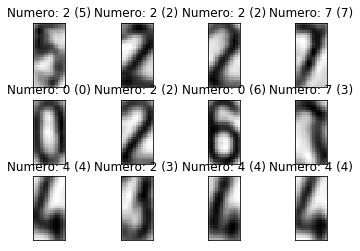

In [7]:
fig = plt.figure()
num = 0

testing_data = np.load(TEST_DATA, allow_pickle=True)
np.random.shuffle(testing_data)

with open(f"result-{MODEL_NAME}.txt", 'w') as fp:
    for img_data in testing_data:
        img = img_data[0]
        orig = img
        img = img.reshape(-1, COL_SIZE, ROW_SIZE, 1)
        prediction = model.predict(img)[0]
        str_label = f"Numero: {np.argmax(prediction)} ({img_data[1]})"
        output = ["{0:.2f}%".format(i * 100) for i in prediction]
        fp.write(f"{str(output)} - {img_data[1]}\n")
        
        if num < 12:
            print(["{0:.2f}%".format(i * 100) for i in prediction])
            y = fig.add_subplot(3, 4, num + 1)
            y.imshow(orig, cmap='gray')
            plt.title(str_label)
            y.axes.get_xaxis().set_visible(False)
            y.axes.get_yaxis().set_visible(False)
        num += 1
    plt.show()




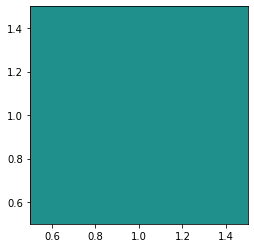

In [2]:
data=np.arange(9).reshape((3,3))
plt.imshow(data)
plt.xlim(0.5, 1.5)
plt.ylim(0.5,1.5)
plt.show()

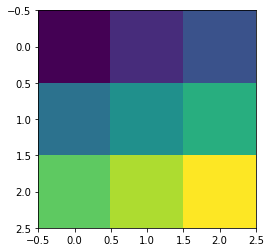

In [3]:
data=np.arange(9).reshape((3,3))
plt.imshow(data)
plt.show()

In [18]:
%reset -f